<a href="https://colab.research.google.com/github/Shiv2183/RetailAnalytics/blob/main/MarketBasketAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np

In [2]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


READING RETAIL DATA

In [4]:
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head(6)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

CHECKING DATA

In [6]:
#Checking Missing Data
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
#Cleaning spaces from description, removing nulls in Invoice no and 
print(df.shape)
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
print(df.shape)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
print(df.shape)

(541909, 8)
(541909, 8)
(532621, 8)


Restructuring DataFrame with a single invoice in a row and all item names as column names and quantity of those items in the cell

In [8]:
basket = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D DOG PICTURE PLAYING CARDS,3D HEARTS HONEYCOMB PAPER GARLAND,3D SHEET OF DOG STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 IVORY DINNER CANDLES SILVER FLOCK,4 PINK DINNER CANDLE SILVER FLOCK,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,50'S CHRISTMAS GIFT BAG LARGE,6 GIFT TAGS 50'S CHRISTMAS,...,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND LARGE BLUE FELT HEART,WOODLAND LARGE PINK FELT HEART,WOODLAND LARGE RED FELT HEART,WOODLAND MINI BACKPACK,WOODLAND PARTY BAG + STICKER SET,WOODLAND SMALL BLUE FELT HEART,WOODLAND SMALL PINK FELT HEART,WOODLAND SMALL RED FELT HEART,WOODLAND STORAGE BOX LARGE,WOODLAND STORAGE BOX SMALL,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP VINTAGE DOILY,WRAP 50'S CHRISTMAS,WRAP ALPHABET DESIGN,WRAP CAROUSEL,WRAP CHRISTMAS VILLAGE,WRAP CIRCUS PARADE,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

CONVERT DATA INTO BINARY DATA 1 IF BOUGHT AND 0 IF NOT BOUGHT

In [9]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [10]:
basket_sets

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D DOG PICTURE PLAYING CARDS,3D HEARTS HONEYCOMB PAPER GARLAND,3D SHEET OF DOG STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 IVORY DINNER CANDLES SILVER FLOCK,4 PINK DINNER CANDLE SILVER FLOCK,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,50'S CHRISTMAS GIFT BAG LARGE,6 GIFT TAGS 50'S CHRISTMAS,...,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND LARGE BLUE FELT HEART,WOODLAND LARGE PINK FELT HEART,WOODLAND LARGE RED FELT HEART,WOODLAND MINI BACKPACK,WOODLAND PARTY BAG + STICKER SET,WOODLAND SMALL BLUE FELT HEART,WOODLAND SMALL PINK FELT HEART,WOODLAND SMALL RED FELT HEART,WOODLAND STORAGE BOX LARGE,WOODLAND STORAGE BOX SMALL,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP VINTAGE DOILY,WRAP 50'S CHRISTMAS,WRAP ALPHABET DESIGN,WRAP CAROUSEL,WRAP CHRISTMAS VILLAGE,WRAP CIRCUS PARADE,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


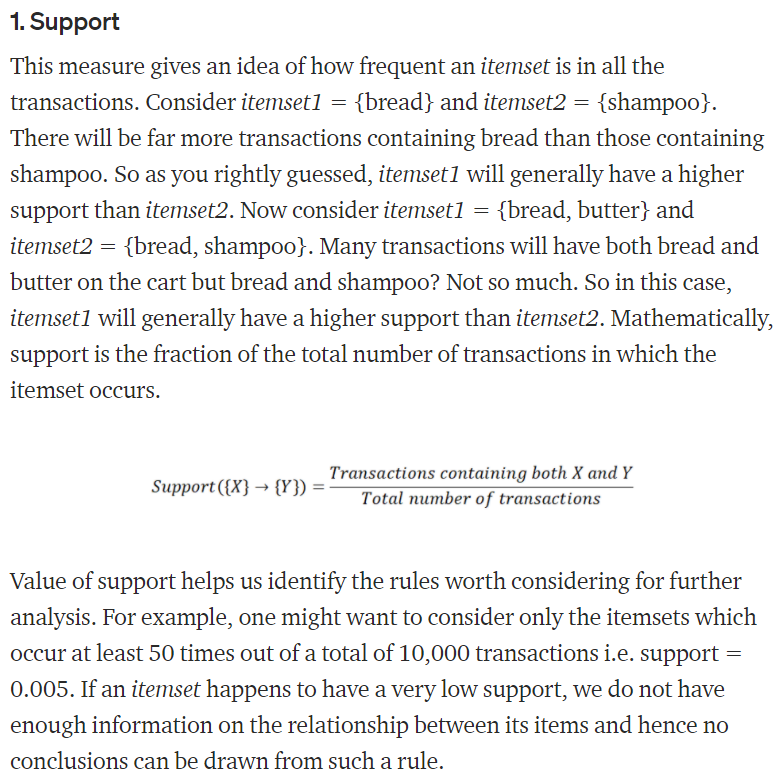

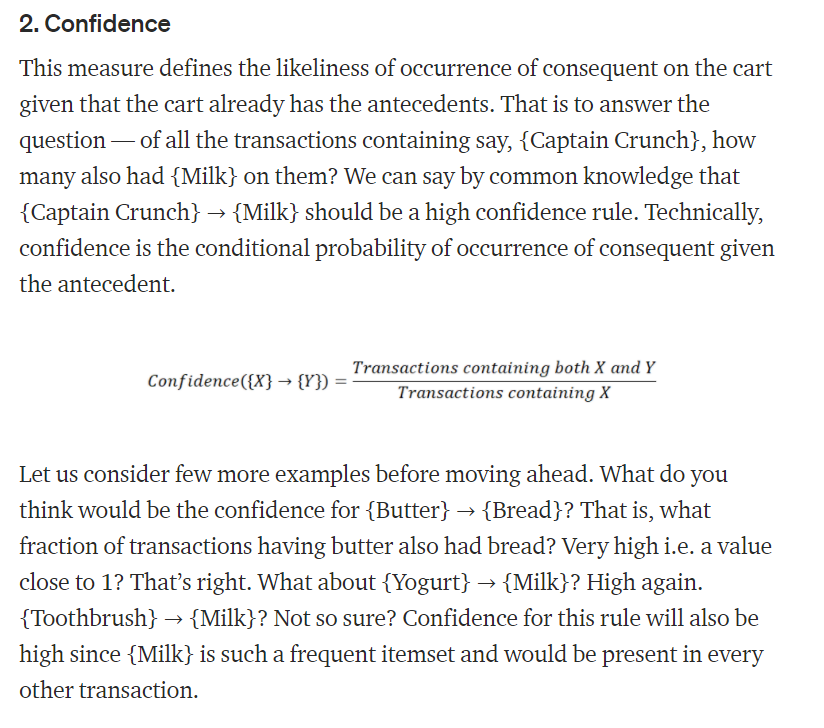

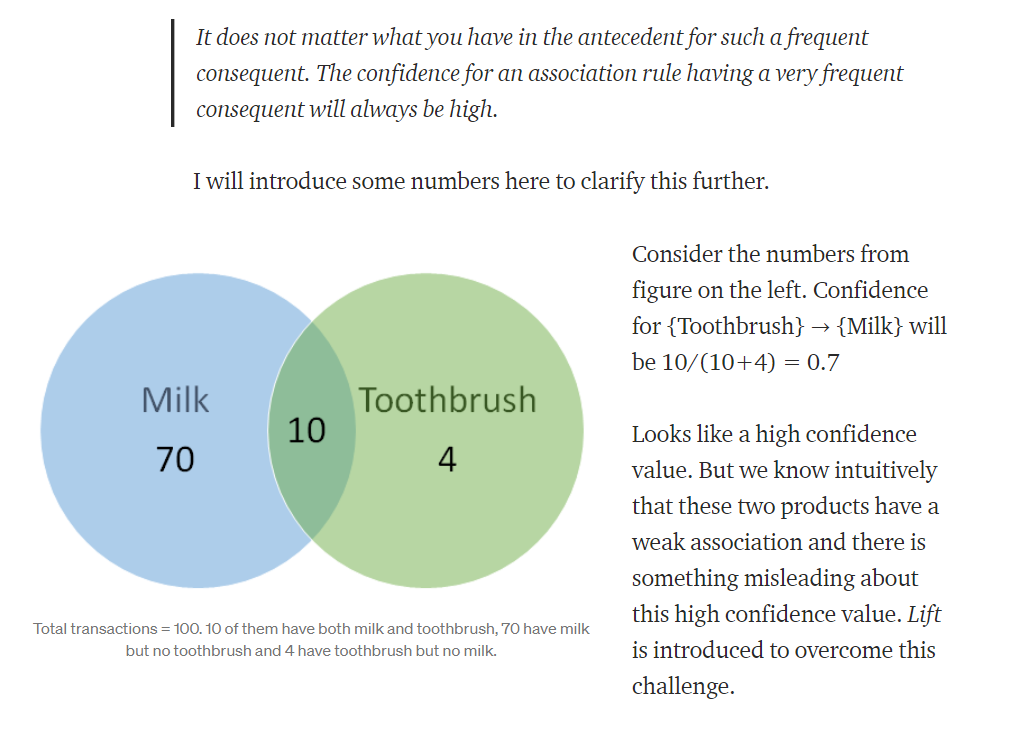

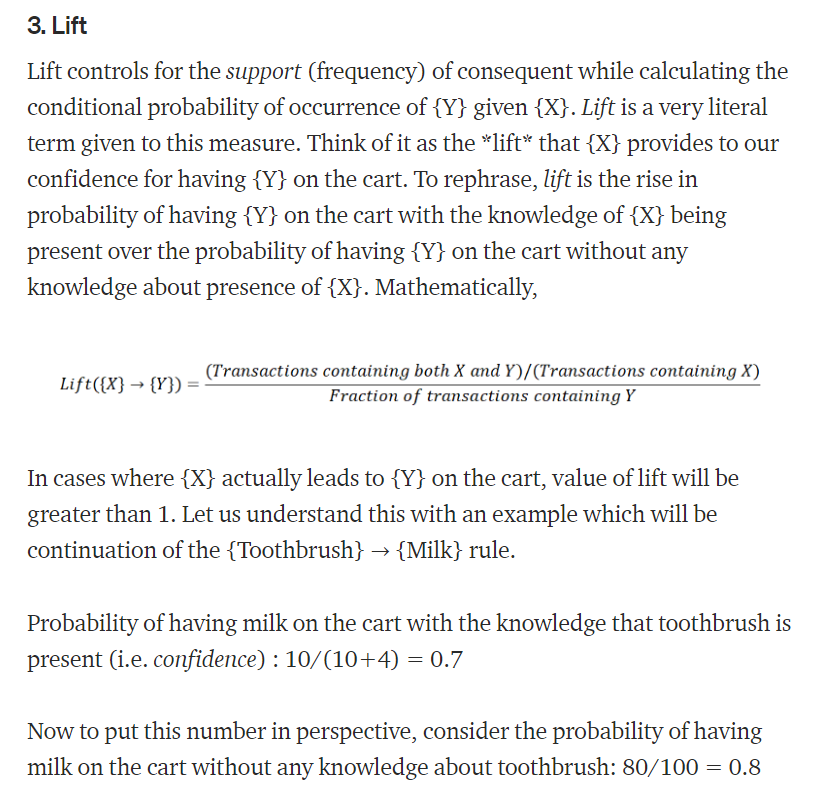

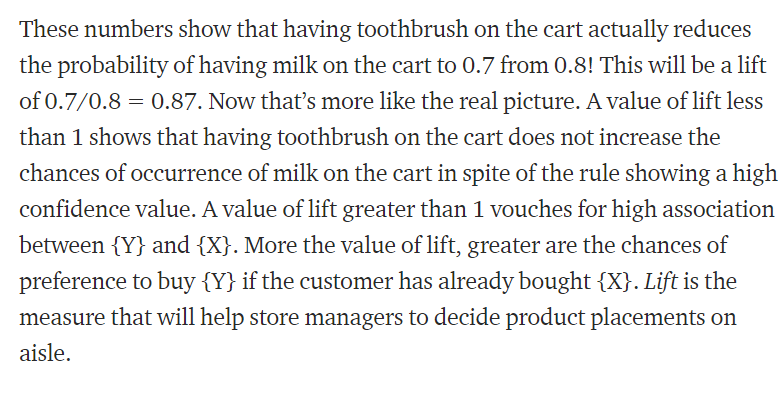

IBM Knowledge Centre

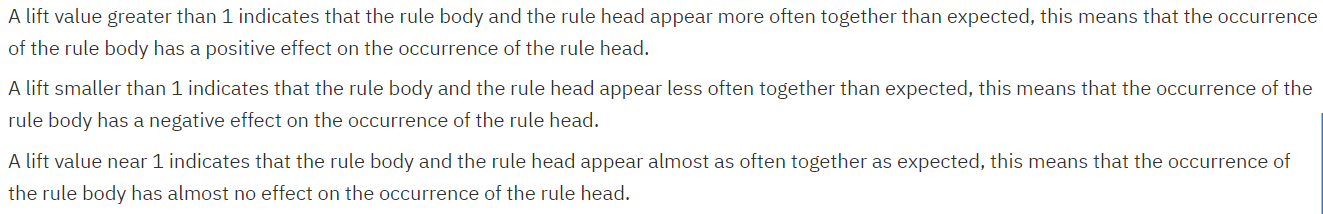

In [11]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.030612,(10 COLOUR SPACEBOY PEN)
1,0.015306,(12 COLOURED PARTY BALLOONS)
2,0.015306,(12 PENCIL SMALL TUBE WOODLAND)
3,0.017857,(12 PENCILS SMALL TUBE RED RETROSPOT)
4,0.017857,(12 PENCILS SMALL TUBE SKULL)
...,...,...
29856,0.010204,"(SKULL LUNCH BOX WITH CUTLERY, ALARM CLOCK BAK..."
29857,0.010204,"(SKULL LUNCH BOX WITH CUTLERY, ALARM CLOCK BAK..."
29858,0.010204,"(SKULL LUNCH BOX WITH CUTLERY, ALARM CLOCK BAK..."
29859,0.010204,"(SKULL LUNCH BOX WITH CUTLERY, ALARM CLOCK BAK..."


In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CARD DOLLY GIRL),(10 COLOUR SPACEBOY PEN),0.030612,0.030612,0.010204,0.333333,10.888889,0.009267,1.454082
1,(10 COLOUR SPACEBOY PEN),(CARD DOLLY GIRL),0.030612,0.030612,0.010204,0.333333,10.888889,0.009267,1.454082
2,(CHARLOTTE BAG SUKI DESIGN),(10 COLOUR SPACEBOY PEN),0.043367,0.030612,0.010204,0.235294,7.686275,0.008877,1.267661
3,(10 COLOUR SPACEBOY PEN),(CHARLOTTE BAG SUKI DESIGN),0.030612,0.043367,0.010204,0.333333,7.686275,0.008877,1.434949
4,(10 COLOUR SPACEBOY PEN),(ICE CREAM SUNDAE LIP GLOSS),0.030612,0.045918,0.010204,0.333333,7.259259,0.008798,1.431122


In [15]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(12 COLOURED PARTY BALLOONS),(SET OF 9 BLACK SKULL BALLOONS),0.015306,0.066327,0.012755,0.833333,12.564103,0.011740,5.602041
49,(12 PENCILS TALL TUBE WOODLAND),(12 PENCILS TALL TUBE RED RETROSPOT),0.015306,0.022959,0.012755,0.833333,36.296296,0.012404,5.862245
69,(36 PENCILS TUBE WOODLAND),(36 PENCILS TUBE RED RETROSPOT),0.022959,0.045918,0.020408,0.888889,19.358025,0.019354,8.586735
143,(BINGO SET),(4 TRADITIONAL SPINNING TOPS),0.010204,0.071429,0.010204,1.000000,14.000000,0.009475,inf
262,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE PINK),0.028061,0.102041,0.022959,0.818182,8.018182,0.020096,4.938776
...,...,...,...,...,...,...,...,...,...
1139899,"(SKULL LUNCH BOX WITH CUTLERY, JUMBO BAG APPLES)","(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",0.010204,0.010204,0.010204,1.000000,98.000000,0.010100,inf
1139904,"(DOLLY GIRL CHILDRENS CUP, ALARM CLOCK BAKELIK...","(SKULL LUNCH BOX WITH CUTLERY, ALARM CLOCK BAK...",0.010204,0.010204,0.010204,1.000000,98.000000,0.010100,inf
1139936,"(DOLLY GIRL CHILDRENS CUP, LUNCH BOX I LOVE LO...","(SKULL LUNCH BOX WITH CUTLERY, ALARM CLOCK BAK...",0.010204,0.010204,0.010204,1.000000,98.000000,0.010100,inf
1139939,"(DOLLY GIRL CHILDRENS CUP, JUMBO BAG APPLES)","(SKULL LUNCH BOX WITH CUTLERY, ALARM CLOCK BAK...",0.010204,0.010204,0.010204,1.000000,98.000000,0.010100,inf


ANOTHER EXAMPLE

In [16]:
df = pd.read_excel('/content/drive/MyDrive/MMM_Data/online_retail_II.xlsx')
print(df.shape)
df.head()

(525461, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


CLEANING DATA

In [17]:
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [18]:
df = df[df.Quantity>0]
print(df.shape)
df = df[df.Price>0]
print(df.shape)

(513135, 8)
(511566, 8)


In [19]:
df['StockCode'] = df['StockCode'].astype(str).str.replace(r'[a-zA-Z]+','')
df = df[(df['StockCode']!='') & (df['StockCode']!=' ')]

In [20]:
df.StockCode.nunique()

3325

In [21]:
df.Description.nunique()

4521

CLEANING

In [22]:
basket = df.groupby(['Invoice', 'StockCode'])['Quantity'].sum().unstack().fillna(0)
basket

StockCode,0003,0004,001,002,0037,0041,0044,0058,0062,0066,0068,0069,0070,0072,0075,0076,10002,1002,10080,10109,10120,10123,10124,10125,10133,10134,10135,10138,11001,15030,15034,15036,15039,15044,15056,15058,15059,15060,16008,16010,...,90179,90180,90181,90182,90183,90184,90185,90186,90187,90188,90189,90190,90191,90192,90194,90195,90196,90197,90198,90199,90200,90201,90202,90203,90204,90205,90206,90208,90209,90210,90211,90212,90214,_0001_10,_0001_20,_0001_30,_0001_40,_0001_50,_0001_70,_0001_80
Invoice,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
def PresentAbsent(x):
  if x > 0:
      return 1
  else:
      return 0

basket_sets = basket.applymap(PresentAbsent)

APRIORI

In [24]:
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.023507,(15036)
1,0.047256,(15056)
2,0.025838,(20676)
3,0.021224,(20677)
4,0.051773,(20685)
...,...,...
331,0.025838,"(85123, 82494)"
332,0.021418,"(85123, 84879)"
333,0.022729,"(85123, 84970)"
334,0.022924,"(84992, 84991)"


In [25]:
association_rules(frequent_itemsets, metric='lift', min_threshold=5.0)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(85099),(20713),0.131617,0.033171,0.024769,0.188192,5.673310,0.020403,1.190957
1,(20713),(85099),0.033171,0.131617,0.024769,0.746706,5.673310,0.020403,3.428355
2,(20719),(20724),0.037057,0.050121,0.021127,0.570118,11.374737,0.019269,2.209626
3,(20724),(20719),0.050121,0.037057,0.021127,0.421512,11.374737,0.019269,1.664585
4,(20723),(20724),0.032929,0.050121,0.020593,0.625369,12.477076,0.018942,2.535503
...,...,...,...,...,...,...,...,...,...
71,(22469),(22470),0.049781,0.053035,0.026566,0.533659,10.062298,0.023926,2.030625
72,(82482),(82494),0.045993,0.055367,0.029383,0.638860,11.538700,0.026837,2.615695
73,(82494),(82482),0.055367,0.045993,0.029383,0.530702,11.538700,0.026837,2.032837
74,(84992),(84991),0.042302,0.064886,0.022924,0.541906,8.351678,0.020179,2.041314


RECENCY FREQUENCY MONETORY

In [26]:
df.shape

(509416, 8)

In [27]:
df.isna().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    102986
Country             0
dtype: int64

CLEANING DATA

In [28]:
ndf =df.dropna(subset=['Customer ID'])

In [29]:
ndf.shape

(406430, 8)

In [30]:
ndf.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [31]:
ndf['Customer ID'] = ndf['Customer ID'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
ndf['Customer ID'].nunique()

4286

In [33]:
ndf.Country.value_counts()

United Kingdom          370499
EIRE                      8473
Germany                   7376
France                    5290
Netherlands               2661
Spain                     1195
Switzerland               1146
Belgium                    988
Portugal                   956
Sweden                     841
Channel Islands            821
Italy                      695
Australia                  625
Cyprus                     539
Greece                     511
Austria                    504
Denmark                    408
Norway                     362
Finland                    338
United Arab Emirates       313
Unspecified                277
USA                        225
Poland                     181
Malta                      168
Japan                      164
Lithuania                  154
Singapore                  117
Canada                      77
Thailand                    76
Israel                      74
Iceland                     71
RSA                         65
Brazil  

In [34]:
ndf = ndf[ndf['Country']=='United Kingdom']

In [35]:
ndf.InvoiceDate.unique()

array(['2009-12-01T07:45:00.000000000', '2009-12-01T07:46:00.000000000',
       '2009-12-01T09:06:00.000000000', ...,
       '2010-12-09T19:28:00.000000000', '2010-12-09T19:32:00.000000000',
       '2010-12-09T20:01:00.000000000'], dtype='datetime64[ns]')

In [36]:
import datetime as dt
NOW = dt.datetime(2011,6,10)
ndf['InvoiceDate'] = pd.to_datetime(ndf['InvoiceDate'])

FEATURE CREATION

In [37]:
ndf['TotalPrice'] = ndf['Quantity'] * ndf['Price']
ndf.head(6)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,39.6


RFM TABLE

In [38]:
RFMTable = ndf.groupby('Customer ID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'Invoice': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})

In [39]:
RFMTable['InvoiceDate'] = RFMTable['InvoiceDate'].astype(int)
RFMTable.rename(columns={'InvoiceDate': 'recency', 
                         'Invoice': 'frequency', 
                         'TotalPrice': 'monetary_value'}, inplace=True)

In [40]:
RFMTable['r_quartile'] = pd.qcut(RFMTable['recency'], 5)
RFMTable['f_quartile'] = pd.qcut(RFMTable['frequency'], 5)
RFMTable['m_quartile'] = pd.qcut(RFMTable['monetary_value'], 5)

In [41]:
RFMTable['r_quartile'] = pd.Categorical(RFMTable['r_quartile']).codes
RFMTable['f_quartile'] = pd.Categorical(RFMTable['f_quartile']).codes
RFMTable['m_quartile'] = pd.Categorical(RFMTable['m_quartile']).codes

In [42]:
RFMTable['rfm_segment'] = (RFMTable['r_quartile']).astype(str) + RFMTable['f_quartile'].astype(str) + RFMTable['m_quartile'].astype(str)
RFMTable['rfm_segment'] = RFMTable['rfm_segment'].astype(str)

In [43]:
RFMTable[RFMTable['rfm_segment'] == '444']

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_segment
Customer ID,,,,,,,
12957,358,252,4689.43,4,4,4,444
14685,393,195,4619.79,4,4,4,444
15823,546,154,3867.17,4,4,4,444
16335,368,366,2774.00,4,4,4,444
17032,420,236,2916.97,4,4,4,444
17113,391,159,2322.59,4,4,4,444
17230,380,154,6286.54,4,4,4,444
17400,398,268,2547.09,4,4,4,444


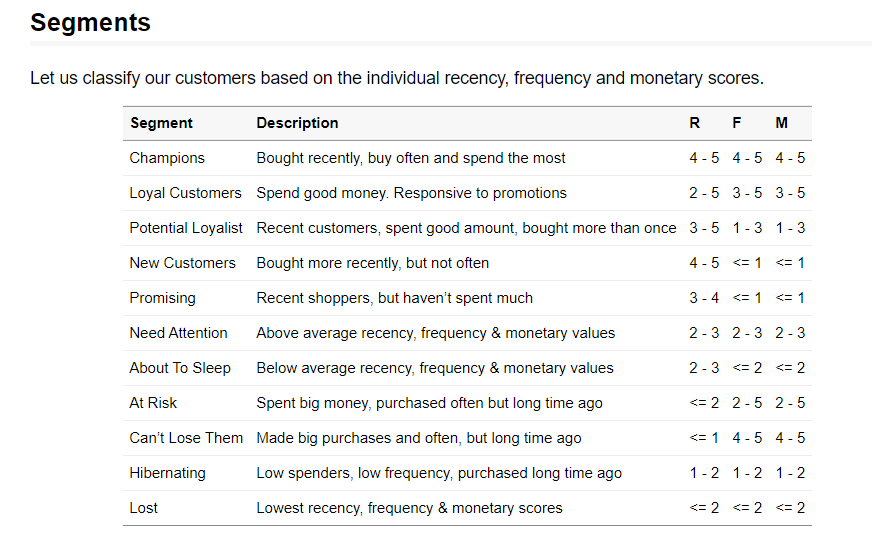

In [44]:
RFMTable.dtypes

recency             int64
frequency           int64
monetary_value    float64
r_quartile           int8
f_quartile           int8
m_quartile           int8
rfm_segment        object
dtype: object

In [45]:
#Custom Seg
segt_map = {
    r'[0-1][0-1]': 'hibernating',
    r'[0-1][2-3]': 'at risk',
    r'[0-1]4': 'can\'t loose',
    r'2[0-1]': 'about to sleep',
    r'22': 'need attention',
    r'[2-3][3-4]': 'loyal customers',
    r'30': 'promising',
    r'40': 'new customers',
    r'[3-4][1-2]': 'potential loyalists',
    r'4[3-4]': 'champions'
}

RFMTable['Segment'] = RFMTable['r_quartile'].map(str) + RFMTable['f_quartile'].map(str)
RFMTable['Segment'] = RFMTable['Segment'].replace(segt_map, regex=True)
RFMTable.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_segment,Segment
Customer ID,,,,,,,,
12346,346,33,372.86,3,2,1,321,potential loyalists
12608,221,16,415.79,2,1,1,211,about to sleep
12745,303,22,723.85,3,1,2,312,potential loyalists
12746,357,17,254.55,3,1,1,311,potential loyalists
12747,186,154,5080.53,0,4,4,044,can't loose


In [46]:
RFMTable.Segment.value_counts()

potential loyalists    775
at risk                682
can't loose            583
loyal customers        509
hibernating            359
new customers          321
about to sleep         303
promising              195
need attention         151
champions               75
Name: Segment, dtype: int64

ANOTHER WAY

In [47]:
RFMTable_copy = RFMTable.copy()

In [48]:
RFMTable.drop(columns=['r_quartile',	'f_quartile',	'm_quartile',	'rfm_segment', 'Segment'], inplace=True)

In [49]:
RFMTable

,recency,frequency,monetary_value
Customer ID,,,
12346,346,33,372.86
12608,221,16,415.79
12745,303,22,723.85
12746,357,17,254.55
12747,186,154,5080.53
...,...,...,...
18283,199,230,641.77
18284,248,28,461.68
18285,477,12,427.00


In [50]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

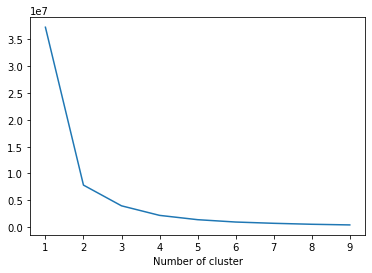

In [51]:
recency = RFMTable[['recency']]
sse={} # error
for k in range(1,10):
  kmeans = KMeans(n_clusters=k, max_iter=500).fit(recency)
  recency['cluster'] = kmeans.labels_
  sse[k] = kmeans.inertia_ 

import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [52]:
kmeans = KMeans(n_clusters=4, max_iter=500).fit(recency)
RFMTable['r_cluster'] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

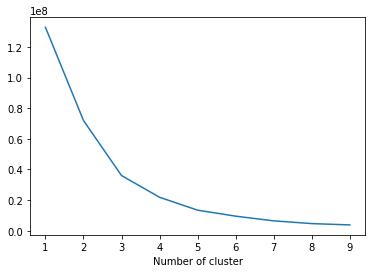

In [53]:
frequency = RFMTable[['frequency']]
sse={} # error
for k in range(1,10):
  kmeans = KMeans(n_clusters=k, max_iter=500).fit(frequency)
  frequency['cluster'] = kmeans.labels_
  sse[k] = kmeans.inertia_ 

import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [54]:
kmeans = KMeans(n_clusters=5, max_iter=500).fit(frequency)
RFMTable['f_cluster'] = kmeans.labels_

In [55]:
RFMTable

,recency,frequency,monetary_value,r_cluster,f_cluster
Customer ID,,,,,
12346,346,33,372.86,0,0
12608,221,16,415.79,1,0
12745,303,22,723.85,3,0
12746,357,17,254.55,0,0
12747,186,154,5080.53,1,4
...,...,...,...,...,...
18283,199,230,641.77,1,4
18284,248,28,461.68,3,0
18285,477,12,427.00,2,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

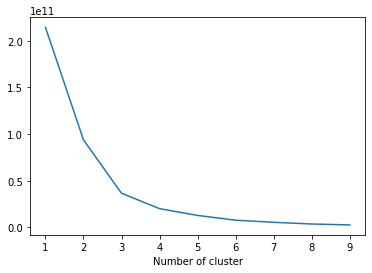

In [56]:
monetary_value = RFMTable[['monetary_value']]
sse={} # error
for k in range(1,10):
  kmeans = KMeans(n_clusters=k, max_iter=500).fit(monetary_value)
  monetary_value['cluster'] = kmeans.labels_
  sse[k] = kmeans.inertia_ 

import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [57]:
kmeans = KMeans(n_clusters=4, max_iter=500).fit(monetary_value)
RFMTable['m_cluster'] = kmeans.labels_

In [58]:
RFMTable['rfm_cluster'] = RFMTable['r_cluster'] + RFMTable['f_cluster'] + RFMTable['m_cluster']

In [59]:
RFMTable['rfm_cluster'].unique()

array([ 3,  4,  6,  8,  2,  5,  7, 10,  1,  0,  9], dtype=int32)

In [60]:
RFMTable

,recency,frequency,monetary_value,r_cluster,f_cluster,m_cluster,rfm_cluster
Customer ID,,,,,,,
12346,346,33,372.86,0,0,3,3
12608,221,16,415.79,1,0,3,4
12745,303,22,723.85,3,0,3,6
12746,357,17,254.55,0,0,3,3
12747,186,154,5080.53,1,4,3,8
...,...,...,...,...,...,...,...
18283,199,230,641.77,1,4,3,8
18284,248,28,461.68,3,0,3,6
18285,477,12,427.00,2,0,3,5


In [61]:
RFMTable.groupby('r_cluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
r_cluster,,,,,,,,
0,552.0,374.760870,30.870329,321.0,347.0,373.0,400.0,429.0
1,1983.0,202.102370,14.497194,182.0,190.0,199.0,212.0,233.0
2,413.0,489.239709,40.256799,434.0,454.0,483.0,539.0,555.0
3,1005.0,264.055721,24.105406,234.0,245.0,256.0,281.0,319.0


In [62]:
RFMTable.groupby('f_cluster')['frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
f_cluster,,,,,,,,
0,3134.0,39.959158,31.312795,1.0,15.00,31.0,59.00,123.0
1,17.0,1566.823529,500.240347,1088.0,1211.00,1334.0,1726.00,2614.0
2,130.0,549.876923,144.636192,380.0,429.75,515.5,626.00,1034.0
3,2.0,4449.500000,837.921536,3857.0,4153.25,4449.5,4745.75,5042.0
4,670.0,206.340299,66.458056,124.0,150.00,189.5,246.00,378.0


In [63]:
RFMTable.groupby('m_cluster')['monetary_value'].describe()

,count,mean,std,min,25%,50%,75%,max
m_cluster,,,,,,,,
0,135.0,12850.296815,6286.077078,7021.66,8195.465,10423.200,15285.885,32451.60
1,1.0,349164.350000,NaN,349164.35,349164.350,349164.350,349164.350,349164.35
2,16.0,60692.626250,24206.042991,38683.02,45629.460,51815.585,69247.355,131443.19
3,3801.0,1132.219569,1266.879632,2.95,295.050,633.990,1491.400,6927.98


CUSTOMER LIFETIME VALUE PREDICTION

In [133]:
df['Revenue'] = df['Quantity'] *df['Price']
ndf = df[df['Country']=='United Kingdom']

In [134]:
ndf.shape

(472042, 9)

In [135]:
ndf_revenue = ndf.groupby('Invoice').Revenue.sum().reset_index(name='Invoice Value')
ndf_revenue.shape

(19066, 2)

In [136]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Revenue'], dtype='object')

In [137]:
ndf_revenue.columns

Index(['Invoice', 'Invoice Value'], dtype='object')

In [138]:
ndf = pd.merge(df, ndf_revenue, on='Invoice')
ndf.shape

(472042, 10)

In [139]:
ndf['Year'] = ndf.InvoiceDate.dt.year

In [140]:
ndf['Month'] = ndf.InvoiceDate.dt.month

In [141]:
ndf['InvoiceYearMonth'] = ndf['Year'].astype(str)+ndf['Month'].astype(str)

In [142]:
ndf['InvoiceDate'].describe()

count                  472042
unique                  17817
top       2010-12-06 16:57:00
freq                      674
first     2009-12-01 07:45:00
last      2010-12-09 20:01:00
Name: InvoiceDate, dtype: object

Last 3 months and 6 months

In [146]:
from datetime import date
ndf_3m = ndf[(ndf.InvoiceDate < pd.to_datetime(date(2010,12,9))) & (ndf.InvoiceDate >= pd.to_datetime(date(2010,9,9)))].reset_index(drop=True) #3 months time
ndf_6m = ndf[(ndf.InvoiceDate < pd.to_datetime(date(2010,12,9))) & (ndf.InvoiceDate >= pd.to_datetime(date(2010,6,9)))].reset_index(drop=True) #6 months time

In [147]:
ndf_3m.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Invoice Value,Year,Month,InvoiceYearMonth
0,521829,22384,LUNCH BAG PINK RETROSPOT,40,2010-09-09 10:44:00,1.65,17242.0,United Kingdom,66.0,737.3,2010,9,20109
1,521829,22352,LUNCH BOX WITH CUTLERY RETROSPOT,12,2010-09-09 10:44:00,2.55,17242.0,United Kingdom,30.6,737.3,2010,9,20109


In [148]:
ndf_6m_id = ndf_6m.groupby('Customer ID')['Revenue'].sum().reset_index(name='m6_Revenue')
ndf_6m_id.head()

,Customer ID,m6_Revenue
0,12346.0,142.31
1,12608.0,415.79
2,12745.0,266.93
3,12746.0,254.55
4,12747.0,3096.99


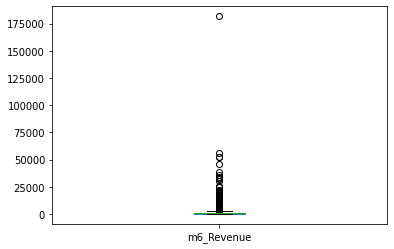

In [151]:
ndf_6m_id['m6_Revenue'].plot(kind='box')

In [154]:
RFMTable_CI = pd.merge(RFMTable_copy, ndf_6m_id, left_on=RFMTable_copy.index, right_on='Customer ID', how='left')

In [155]:
RFMTable_CI.m6_Revenue = RFMTable_CI.m6_Revenue.fillna(0)

In [157]:
RFMTable_CI.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_segment,Segment,Customer ID,m6_Revenue
0,346,33,372.86,3,2,1,321,potential loyalists,12346,142.31
1,221,16,415.79,2,1,1,211,about to sleep,12608,415.79
2,303,22,723.85,3,1,2,312,potential loyalists,12745,266.93
3,357,17,254.55,3,1,1,311,potential loyalists,12746,254.55
4,186,154,5080.53,0,4,4,044,can't loose,12747,3096.99


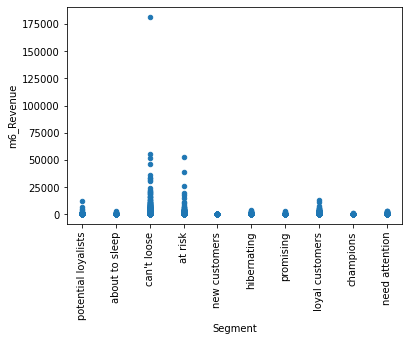

In [162]:
RFMTable_CI.plot.scatter(x='Segment', y='m6_Revenue', rot=90)

In [ ]:
#remove outliers
RFMTable_CI = RFMTable_CI[RFMTable_CI['m6_Revenue']<RFMTable_CI['m6_Revenue'].quantile(0.99)]

In [ ]:
#https://www.kaggle.com/shailaja4247/customer-lifetime-value-prediction

SALES FORECASTING

CONSUMER ELECTRONICS

In [64]:
#https://towardsdatascience.com/market-mix-modeling-mmm-101-3d094df976f9

In [65]:
#https://github.com/Shiv2183/Budget-Optimization-in-Ecommerce-using-Market-Mix-Modelling/blob/master/E-commerce_Capstone_Project.ipynb

In [66]:
!git clone https://github.com/Shiv2183/Budget-Optimization-in-Ecommerce-using-Market-Mix-Modelling.git

Cloning into 'Budget-Optimization-in-Ecommerce-using-Market-Mix-Modelling'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [67]:
# import libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Pandas Settings
# pd.options.display.float_format = '{:.1f}'.format
pd.set_option('display.max_rows', 40000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Miscellaneous imports
from datetime import datetime
from scipy.stats import norm
import re

In [68]:
ConsumerElectronics = pd.read_csv('/content/drive/MyDrive/MMM_Data/ConsumerElectronics.csv')
ConsumerElectronics.shape

(1648824, 20)

In [69]:
ConsumerElectronics.head(2)

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0


MEDIA INVESTMENT

In [70]:
MediaInv = pd.read_csv('/content/Budget-Optimization-in-Ecommerce-using-Market-Mix-Modelling/media_investment.csv')
MediaInv.drop(MediaInv.columns[0], axis=1, inplace = True)
MediaInv.shape

(52, 51)

In [71]:
MediaInv.head(2)

,Week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock
0,28,4.265,0.0,0.0,4.265,4.265,0.054,0.0,0.0,0.054,0.0540,0.633,0.0,0.0,0.633,0.6330,1.854,0.0,0.0,1.854,1.8540,0.0,0.0,0.0,0.0,0.0,0.332,0.0,0.0,0.332,0.3320,0.137,0.0,0.0,0.137,0.1370,1.256,0.0,0.0,1.256,1.2560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,4.265,0.0,0.0,4.265,6.824,0.054,0.0,0.0,0.054,0.0864,0.633,0.0,0.0,0.633,1.0128,1.854,0.0,0.0,1.854,2.9664,0.0,0.0,0.0,0.0,0.0,0.332,0.0,0.0,0.332,0.5312,0.137,0.0,0.0,0.137,0.2192,1.256,0.0,0.0,1.256,2.0096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


MEDIA DATA INFORMATION

In [72]:
product_list = pd.read_excel('/content/Budget-Optimization-in-Ecommerce-using-Market-Mix-Modelling/Media data and other information.xlsx', sheet_name='Product List')

In [73]:
product_list.drop(labels={'Unnamed: 0'}, axis=1, inplace =True)
product_list.columns = product_list.iloc[0]
product_list.columns.values[0]='product_analytic_vertical'
product_list.drop(index=0, axis=0, inplace =True)
product_list.head(2)

,product_analytic_vertical,Frequency,Percent
1,\N,5828,0.353464
2,AmplifierReceiver,4056,0.245994


Reading the Media Investment excel data file into a dataframe

In [74]:
media_investment = pd.read_excel('/content/Budget-Optimization-in-Ecommerce-using-Market-Mix-Modelling/Media data and other information.xlsx', sheet_name='Media Investment', skiprows=2)
media_investment.drop(media_investment.columns[0], axis=1, inplace = True)
media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,NaN,NaN


Reading the Sale Calendar excel data file into a dataframe

In [75]:
sale_calendar = pd.read_excel('/content/Budget-Optimization-in-Ecommerce-using-Market-Mix-Modelling/Media data and other information.xlsx', sheet_name='Special Sale Calendar', \
                              skiprows=0, skipfooter=2)
sale_calendar.drop(labels={'Unnamed: 0'}, axis=1, inplace =True)
sale_calendar.columns = sale_calendar.iloc[0]
sale_calendar.columns.values[0]='Year'
sale_calendar.drop(index=0, axis=0, inplace =True)
sale_calendar.Year = sale_calendar.Year.ffill()

In [76]:
sale_calendar

,Year,Sales Calendar
1,2015.0,(18-19th July)
2,2015.0,(15-17th Aug)
3,2015.0,(28-30th Aug)
4,2015.0,(17-15th Oct)
5,2015.0,(7-14th Nov)
6,2015.0,(25th Dec'15 - 3rd Jan'16)
7,2016.0,(20-22 Jan)
8,2016.0,(1-2 Feb)
9,2016.0,(20-21 Feb)
10,2016.0,(14-15 Feb)


Reading the net_promoter_score excel file into a dataframe

In [77]:
net_promoter_score = pd.read_excel('/content/Budget-Optimization-in-Ecommerce-using-Market-Mix-Modelling/Media data and other information.xlsx', sheet_name='Monthly NPS Score', \
                              skiprows=0)
net_promoter_score.columns = net_promoter_score.iloc[0]
net_promoter_score.columns.values[0]='score'
net_promoter_score.drop(index=0, axis=0, inplace =True)
net_promoter_score

,score,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
1,NPS,54.5996,59.9871,46.9254,44.3984,47,45.8,47.093,50.3274,49.0206,51.8276,47.307,50.5167
2,Stock Index,1177,1206,1101,1210,1233,1038,1052,1222,1015,1242,1228,1194


NET PROMOTER SCORE

In [78]:
NPS = pd.read_csv('/content/Budget-Optimization-in-Ecommerce-using-Market-Mix-Modelling/net_promoter_score.csv')
NPS.shape

(52, 8)

In [79]:
NPS.head(2)

,Unnamed: 0,Week,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5
0,0,28,54.599588,0.0,0.0,1177.0,0.0,0.0
1,1,29,54.599588,0.0,0.0,1177.0,0.0,0.0


ONTARIO CLIMATE DATA

In [80]:
Ontario2015 = pd.read_csv('/content/drive/MyDrive/MMM_Data/ONTARIO_2015.csv')
Ontario2015.shape

(365, 27)

In [81]:
Ontario2016 = pd.read_csv('/content/drive/MyDrive/MMM_Data/ONTARIO_2016.csv')
Ontario2016.shape

(366, 27)

Reading the product details word file into a dataframe

In [82]:
!pip3 install docx
!pip install python-docx 

     |████████████████████████████████| 61kB 3.4MB/s 
  Created wheel for docx: filename=docx-0.2.4-cp37-none-any.whl size=53925 sha256=612eda8d401e990357a45fb484c6ae5f4128ed8a7ab99469509f61c19ac9af4d
  Stored in directory: /root/.cache/pip/wheels/cc/8d/09/563edfd874a35c0c7ed129b6c4fa890efa4c26458bdec6ffc1
Successfully built docx
     |████████████████████████████████| 5.5MB 7.7MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.10-cp37-none-any.whl size=184491 sha256=5155b6ee0ed1e60485b37e1de8cfcae0a8babd0220d46846420f47c76eb9a0fd
  Stored in directory: /root/.cache/pip/wheels/18/0b/a0/1dd62ff812c857c9e487f27d80d53d2b40531bec1acecfa47b
Successfully built python-docx


In [83]:
# pip install --pre python-docx
import pandas as pd
import io
import csv
from docx import Document

def read_docx_tables(filename, tab_id=None, **kwargs):
    """
    parse table(s) from a Word Document (.docx) into Pandas DataFrame(s)

    Parameters:
        filename:   file name of a Word Document

        tab_id:     parse a single table with the index: [tab_id] (counting from 0).
                    When [None] - return a list of DataFrames (parse all tables)

        kwargs:     arguments to pass to `pd.read_csv()` function

    Return: a single DataFrame if tab_id != None or a list of DataFrames otherwise
    """
    def read_docx_tab(tab, **kwargs):
        vf = io.StringIO()
        writer = csv.writer(vf)
        for row in tab.rows:
            writer.writerow(cell.text for cell in row.cells)
        vf.seek(0)
        return pd.read_csv(vf, **kwargs)

    doc = Document(filename)
    if tab_id is None:
        return [read_docx_tab(tab, **kwargs) for tab in doc.tables]
    else:
        try:
            return read_docx_tab(doc.tables[tab_id], **kwargs)
        except IndexError:
            print('Error: specified [tab_id]: {}  does not exist.'.format(tab_id))
            raise

dfs = read_docx_tables('/content/Budget-Optimization-in-Ecommerce-using-Market-Mix-Modelling/Product Details.docx')

dfs[0]

,super_category,category,sub_category,vertical
0,CE,Camera,Camera,Camcorders
1,CE,Camera,Camera,DSLR
2,CE,Camera,Camera,Instant Cameras
3,CE,Camera,Camera,Point & Shoot
4,CE,Camera,Camera,SportsAndAction
5,CE,CameraAccessory,CameraAccessory,Binoculars
6,CE,CameraAccessory,CameraAccessory,CameraAccessory
7,CE,CameraAccessory,CameraAccessory,CameraBag
8,CE,CameraAccessory,CameraAccessory,CameraBattery
9,CE,CameraAccessory,CameraAccessory,CameraBatteryCharger


In [84]:
# Dropping the extra row(s)/column(s)
product_details = pd.DataFrame(dfs[0])
product_details.drop(product_details.columns[0], axis=1, inplace = True)
product_details.head()

,category,sub_category,vertical
0,Camera,Camera,Camcorders
1,Camera,Camera,DSLR
2,Camera,Camera,Instant Cameras
3,Camera,Camera,Point & Shoot
4,Camera,Camera,SportsAndAction
